In [3]:
import decimal
import boto3
from boto3.dynamodb.conditions import Key, Attr

DEFAULT_REGION = 'eu-west-1'
KEY_CONSTRAINT = '45-TPE'

class DynamoDB(object):
    def __init__(self, region_name):
        self.db = boto3.resource('dynamodb', region_name=region_name)

def deserialize(o):
    if isinstance(o, decimal.Decimal):
        if abs(o) % 1 > 0:
            return float(o)
        else:
            return int(o)
    return o

dynamo = DynamoDB(region_name=DEFAULT_REGION)


In [19]:
arrivals = (dynamo.db.Table('TrainArrival').query(
    KeyConditionExpression=Key('TrainStationKey').eq(KEY_CONSTRAINT),
    ProjectionExpression='DifferenceInMinutes'))
len(arrivals['Items'])

144

In [20]:
late_arrivals=(dynamo.db.Table('TrainArrival').
               query(IndexName='TrainArrivalDifferenceIndex',
                    KeyConditionExpression=Key('TrainStationKey').eq(KEY_CONSTRAINT) & 
                                           Key('DifferenceInMinutes').gt(15)))
late_arrivals['Items']

[{'StationShortCode': 'TPE',
  'ScheduledDate': '2019-05-17',
  'TrainStationKey': '45-TPE',
  'Type': 'ARRIVAL',
  'ActualTime': '2019-05-17T13:12:41.000Z',
  'ScheduledTime': '2019-05-17T12:56:00.000Z',
  'DifferenceInMinutes': Decimal('17')},
 {'StationShortCode': 'TPE',
  'ScheduledDate': '2019-06-14',
  'TrainStationKey': '45-TPE',
  'Type': 'ARRIVAL',
  'ActualTime': '2019-06-14T13:13:48.000Z',
  'ScheduledTime': '2019-06-14T12:56:00.000Z',
  'DifferenceInMinutes': Decimal('18')},
 {'StationShortCode': 'TPE',
  'ScheduledDate': '2019-07-01',
  'TrainStationKey': '45-TPE',
  'Type': 'ARRIVAL',
  'ActualTime': '2019-07-01T13:15:28.000Z',
  'ScheduledTime': '2019-07-01T12:56:00.000Z',
  'DifferenceInMinutes': Decimal('19')},
 {'StationShortCode': 'TPE',
  'ScheduledDate': '2019-06-17',
  'TrainStationKey': '45-TPE',
  'Type': 'ARRIVAL',
  'ActualTime': '2019-06-17T13:23:40.000Z',
  'ScheduledTime': '2019-06-17T12:56:00.000Z',
  'DifferenceInMinutes': Decimal('28')},
 {'StationShortC

In [18]:
import pandas as pd

df = pd.DataFrame(arrivals)
df = df.applymap(lambda x: deserialize(x))

df.head()

,DifferenceInMinutes
0,2
1,18
2,2
3,9
4,12


<Figure size 1800x720 with 0 Axes>

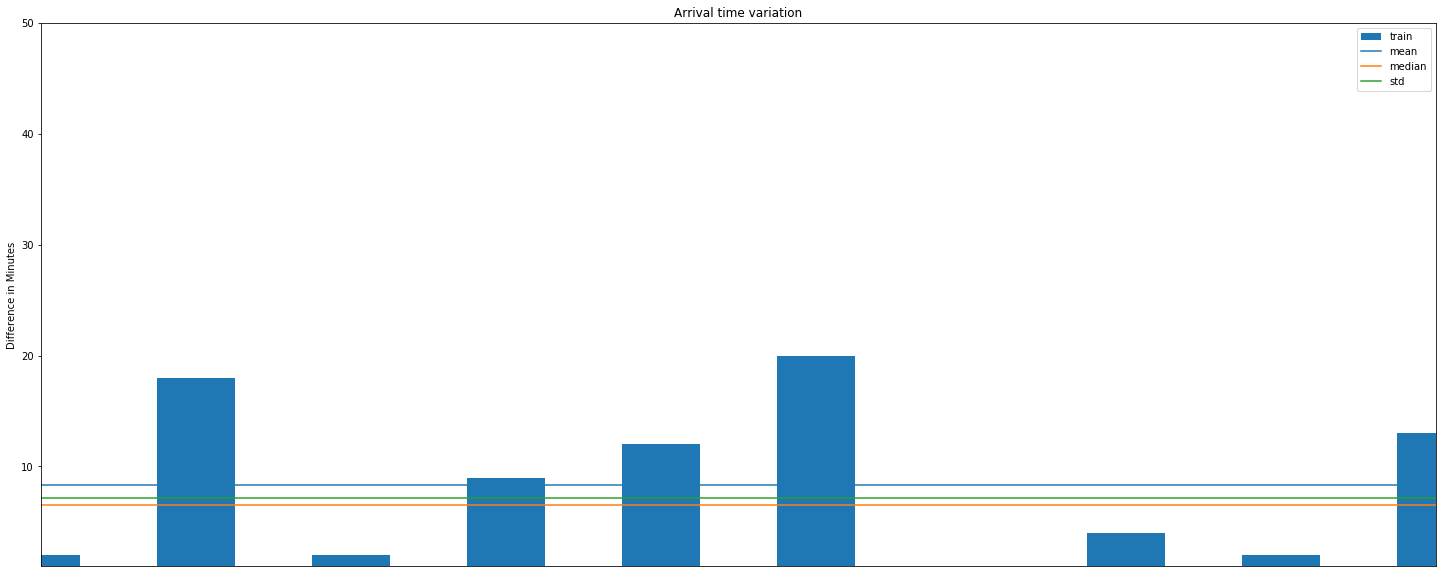

In [20]:
import matplotlib.pyplot as plt
from pandas import Series

plt.rcParams['figure.figsize'] = [25, 10]
plt.figure();
df.columns = ['train']
ax = df.plot(kind='bar')
pd.DataFrame(Series([float(df.mean())]*len(df)), columns=['mean']).plot(ax=ax)
pd.DataFrame(Series([float(df.median())]*len(df)), columns=['median']).plot(ax=ax)
pd.DataFrame(Series([float(df.std())]*len(df)), columns=['std']).plot(ax=ax)
plt.ylim(int(df.min()),50)
plt.title('Arrival time variation')
plt.ylabel('Difference in Minutes')
ax.get_xaxis().set_visible(False)
plt.show()